In [1]:
#Libraries for exploratory data analysis (EDA)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Regression model libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression


from sklearn import metrics

In [2]:
#Dataset 
data = pd.read_csv("C:/Users/HP/Desktop/Octave Analytics projects/Project 1/Superstore_data.csv", encoding=('ISO-8859-1'),low_memory=False)
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer_ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
data.corr()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.009671,-0.001359,-0.004016,0.013480,0.012497
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.001359,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,-0.004016,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.013480,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,0.012497,-0.029961,0.479064,0.066253,-0.219487,1.000000


# Exploratory Data Analyses (EDA)

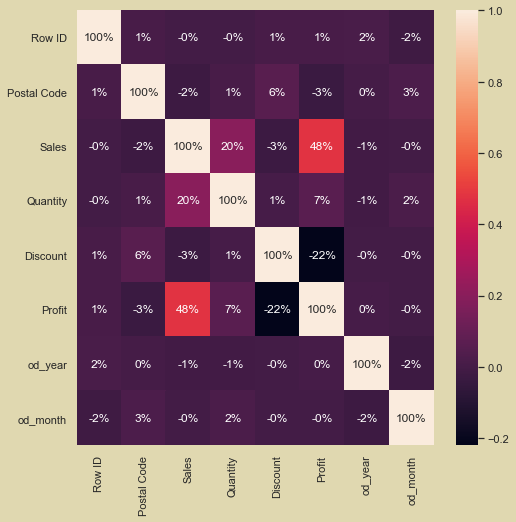

In [44]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True, fmt=".0%");

In [4]:
#Data dimension
print(data.shape)

#checking for empty values
data.isna().sum()

(9994, 21)


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer_ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

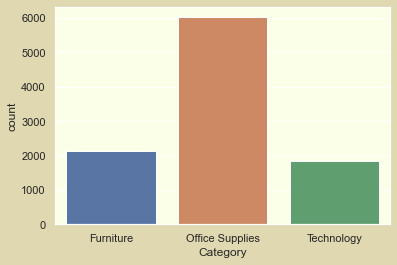

In [43]:
#Products by category
sns.countplot(x = "Category", data = data);


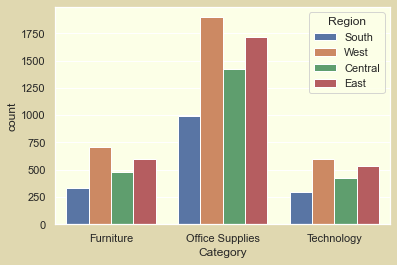

In [34]:
#Products distribution in the regions

sns.countplot(x="Category", hue='Region', data=data);

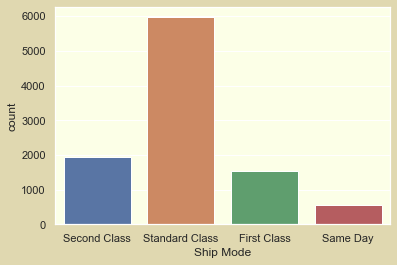

In [35]:
#Classifying mode of shipping products
sns.countplot(x = "Ship Mode", data = data);

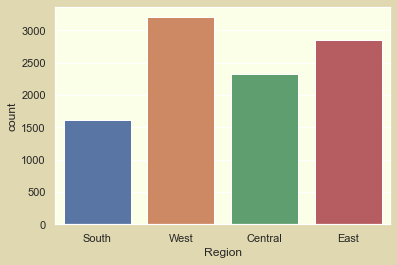

In [36]:
#Count of sales from all regions
sns.countplot(x = "Region", data = data);

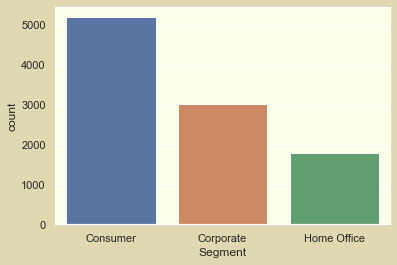

In [37]:
#Classifying product segments
sns.countplot(x = "Segment", data = data);

# Distinct Values

In [10]:
#Number of Customers
#There are 793 distinct customers in the data
distinct_customer=data.Customer_ID.value_counts()
distinct_customer

pd.DataFrame(data.nunique())

,0
Row ID,9994
Order ID,5009
Order Date,1237
Ship Date,1334
Ship Mode,4
Customer_ID,793
Customer Name,793
Segment,3
Country,1
City,531


# Top Customers Analysis

In [11]:
#Top Customers
top_customers = data.groupby(by=['Customer Name']).sum().round(2)
top_customers = top_customers.sort_values('Sales', ascending=False).head(20)
top_customers.head()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Customer Name,,,,,,
Sean Miller,77545,482091,25043.05,50,3.7,-1980.74
Tamara Chand,75386,586036,19052.22,42,1.4,8981.32
Raymond Buch,69857,914035,15117.34,71,1.7,6976.10
Tom Ashbrook,48932,375032,14595.62,36,0.8,4703.79
Adrian Barton,130088,1359311,14473.57,73,4.8,5444.81


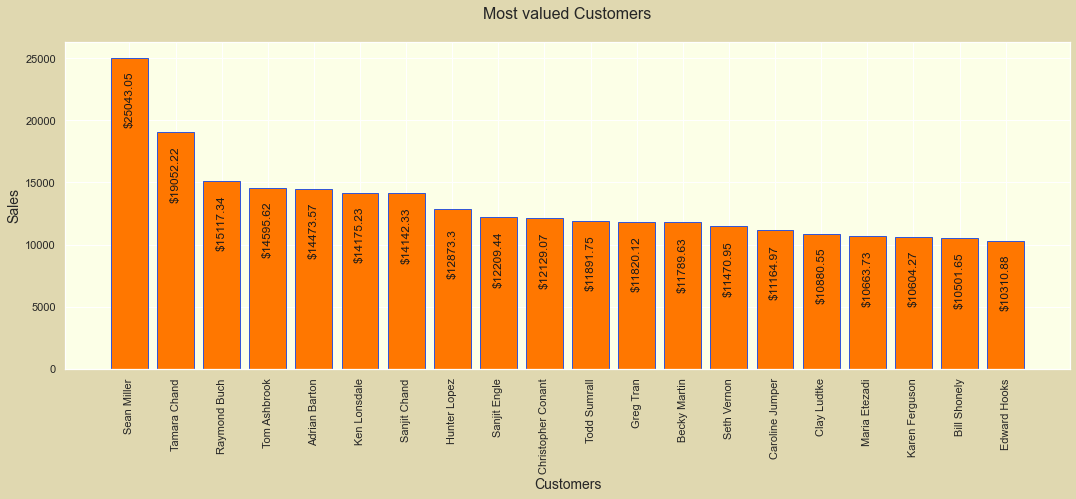

In [38]:
# Vizualization showing top valued customers
plt.figure(figsize=[18,6])
plt.bar(top_customers.index, top_customers.Sales, color='#FF7700', edgecolor='#3457D5')
plt.xticks(rotation=90)
plt.title("Most valued Customers\n", fontsize=16)
plt.xlabel('Customers', fontsize=14)
plt.ylabel('Sales', fontsize=14)

for i, v in enumerate(top_customers.Sales):
    plt.text(i, v-5500, s='$'+str(v), color='k', fontsize=12 ,rotation=90, horizontalalignment='center')
    
plt.show()

# Top Revenue generating Cities

In [13]:
top_cities = data.groupby(by=['City']).sum().round(2)
top_cities = top_cities.sort_values('Sales', ascending=False).head(20)
top_cities.head()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
City,,,,,,
New York City,4450928,9168909,256368.16,3417,51.4,62036.98
Los Angeles,3785302,67252887,175851.34,2879,55.5,30440.76
Seattle,2199185,41989758,119540.74,1590,27.8,29156.10
San Francisco,2462471,47998395,112669.09,1935,34.0,17507.39
Philadelphia,2531454,10275302,109077.01,1981,175.5,-13837.77


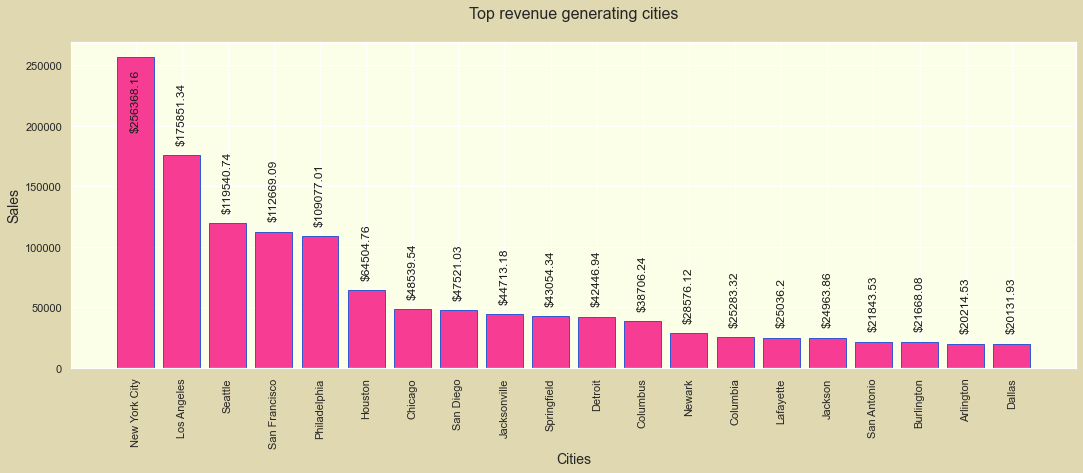

In [39]:
# Vizualization showing top revenue generating cities
plt.figure(figsize=[18,6])
plt.bar(top_cities.index, top_cities.Sales, color='#F73D93', edgecolor='#3457D5')
plt.xticks(rotation=90)
plt.title("Top revenue generating cities\n", fontsize=16)
plt.xlabel('Cities', fontsize=14)
plt.ylabel('Sales', fontsize=14)


for i, v in top_cities.Sales.items():
        if v>200000:
            plt.text(i, v-60000, s='$'+str(v), color='k', fontsize=12 ,rotation=90, horizontalalignment='center')
        else:
            plt.text(i, v+10000, s='$'+str(v), color='k', fontsize=12 ,rotation=90, horizontalalignment='center')
    
plt.show()

# Top Revenue generated by States

In [15]:
# Top Revenue generated by States
top_states = data.groupby(by=['State']).sum().round(2)
top_states = top_states.sort_values('Sales', ascending=False).head(20)
top_states.head()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
State,,,,,,
California,10137449,184382639,457687.63,7667,145.60,76381.39
New York,5452096,11835721,310876.27,4224,62.40,74038.55
Texas,5085541,75747693,170188.05,3724,364.64,-25729.36
Washington,2584458,49661687,138641.27,1883,32.40,33402.65
Pennsylvania,2768523,11190565,116511.91,2153,192.90,-15559.96


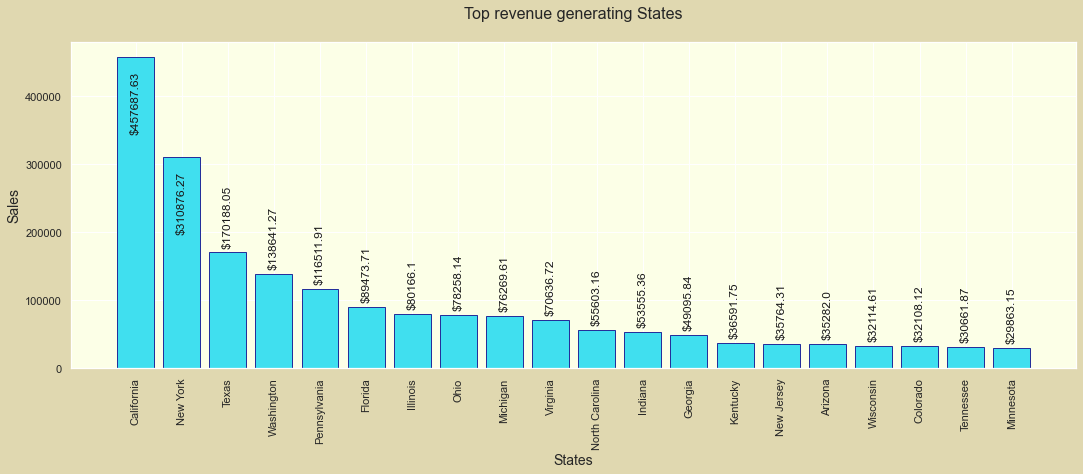

In [42]:
# Vizualization showing top revenue generating States
plt.figure(figsize=[18,6])
plt.bar(top_states.index, top_states.Sales, color='#40DFEF', edgecolor='#242F9B')
plt.xticks(rotation=90)
plt.title("Top revenue generating States\n", fontsize=16)
plt.xlabel('States', fontsize=14)
plt.ylabel('Sales', fontsize=14)


for i, v in top_states.Sales.items():
        if v>200000:
            plt.text(i, v-110000, s='$'+str(v), color='k', fontsize=12 ,rotation=90, horizontalalignment='center')
        else:
            plt.text(i, v+10000, s='$'+str(v), color='k', fontsize=12 ,rotation=90, horizontalalignment='center')
    
plt.show()

# Most Purchased items

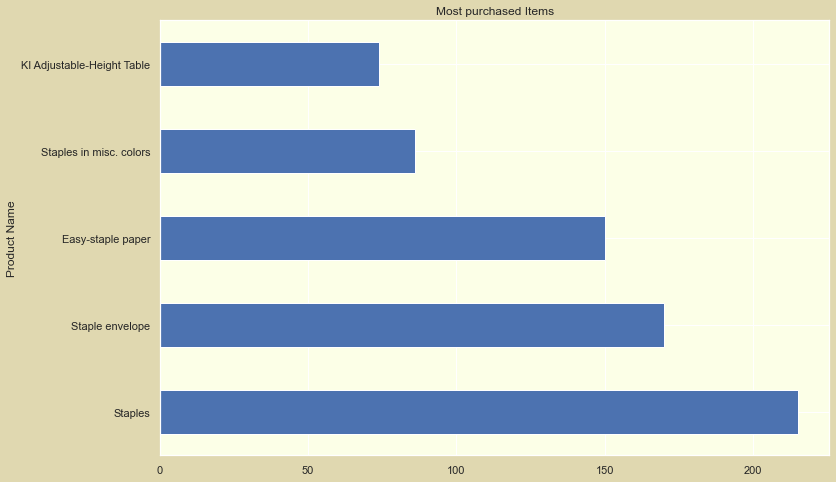

In [33]:
plt.figure(figsize=(12,8))
data.groupby('Product Name')['Quantity'].sum().nlargest(5).plot.barh()
plt.title('Most purchased Items')
plt.show()

# Number of orders on each month of the year

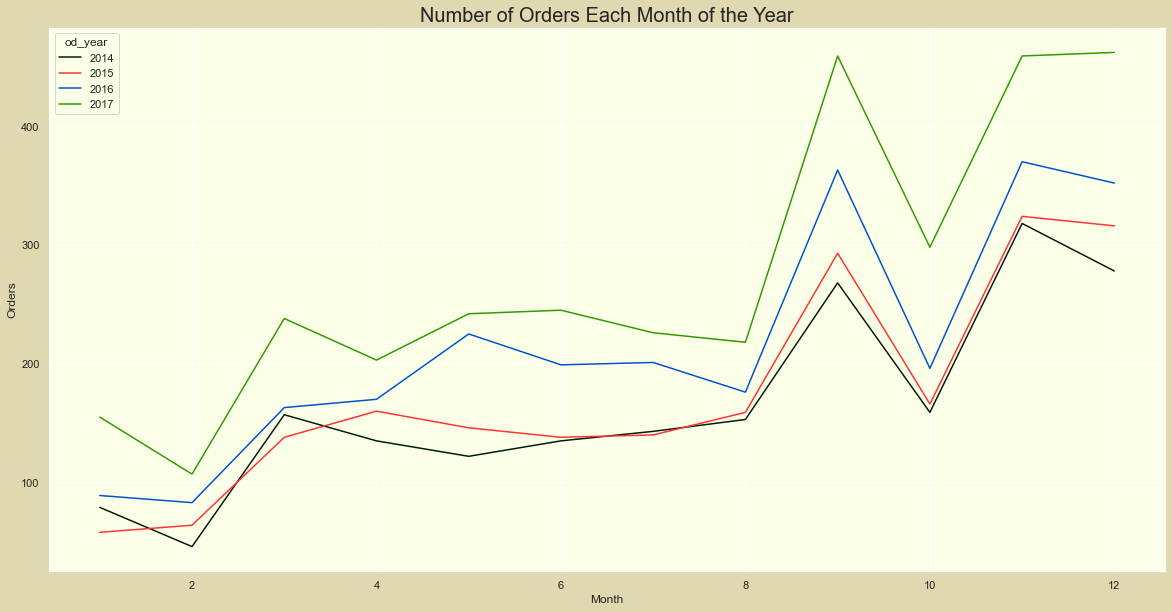

In [30]:
#Number of orders on each month of the year

data['od_year'] = pd.DatetimeIndex(data['Order Date']).year
data['od_month'] = pd.DatetimeIndex(data['Order Date']).month
years = data.groupby(['od_year', 'od_month']).count().reset_index()

plt.figure(figsize=(20,10))
sns.set(rc={'axes.facecolor':'#FCFFE7', 'figure.facecolor':'#E0D8B0'})
sns.lineplot(data = years, x = "od_month", y="Order ID", hue = 'od_year', palette = ['#001a09', '#ff3333', '#0052cc', '#339900'])
plt.title("Number of Orders Each Month of the Year", size=20)
plt.xlabel('Month')
plt.ylabel('Orders')
plt.show()